# 高速ウェーブレット変換(FWT)デモ

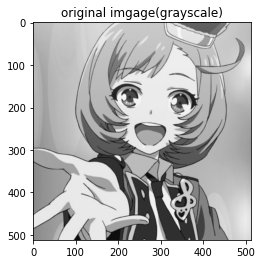

In [1]:
import fwt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('naru512.jpg').convert("L")

# 画像表示
plt.title('original imgage(grayscale)')
plt.imshow(img, cmap="gray")

# 画像にFWTを適用してみる

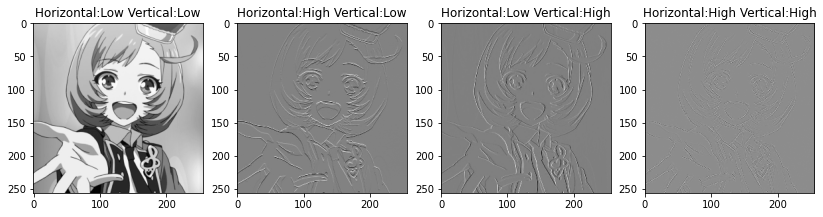

In [2]:
# 画像を配列化
original = np.asarray(img)

# スケーリング係数
HAAR_SCALING_COEF = [0.707106781186547, 0.707106781186547]

# 一回画像を2次元FWT
ll, hl, lh, hh = fwt.fwt2d(original, HAAR_SCALING_COEF)

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

plt.subplot(1,4,1)
plt.title('Horizontal:Low Vertical:Low')
plt.imshow(ll, cmap="gray")
plt.subplot(1,4,2)
plt.title('Horizontal:High Vertical:Low')
plt.imshow(hl, cmap="gray")
plt.subplot(1,4,3)
plt.title('Horizontal:Low Vertical:High')
plt.imshow(lh, cmap="gray")
plt.subplot(1,4,4)
plt.title('Horizontal:High Vertical:High')
plt.imshow(hh, cmap="gray")

#### Horizontal:Low, Vertical:Low
入力のスケールを半分にした画像

#### Horizontal:High, Vertical:Low
水平（横）方向の誤差成分．

#### Horizontal:Low, Vertical:High
垂直（縦）方向の誤差成分．

#### Horizontal:High, Vertical:High
水平（横）/垂直（縦）方向，つまり斜め方向の誤差が出る

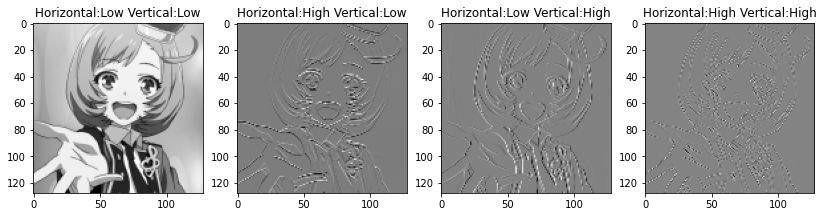

In [3]:
# もう一回2次元FWT
llll, llhl, lllh, llhh = fwt.fwt2d(ll, HAAR_SCALING_COEF)

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

plt.subplot(1,4,1)
plt.title('Horizontal:Low Vertical:Low')
plt.imshow(llll, cmap="gray")
plt.subplot(1,4,2)
plt.title('Horizontal:High Vertical:Low')
plt.imshow(llhl, cmap="gray")
plt.subplot(1,4,3)
plt.title('Horizontal:Low Vertical:High')
plt.imshow(lllh, cmap="gray")
plt.subplot(1,4,4)
plt.title('Horizontal:High Vertical:High')
plt.imshow(llhh, cmap="gray")

__グラフのスケールに注意．半分にしたスケールで同様の解析を行っている．__

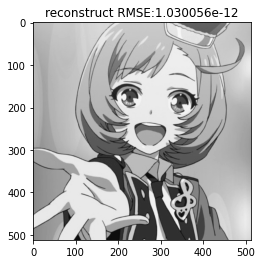

In [4]:
# 再構成してみる
ll = fwt.ifwt2d(llll, llhl, lllh, llhh, HAAR_SCALING_COEF)
reconstruct = fwt.ifwt2d(ll, hl, lh, hh, HAAR_SCALING_COEF)

# 再構成誤差
rmse = np.sqrt(np.mean((original - reconstruct)**2))

plt.title('reconstruct RMSE:%e' % rmse)
plt.imshow(reconstruct, cmap="gray")

# ノイズ除去してみる

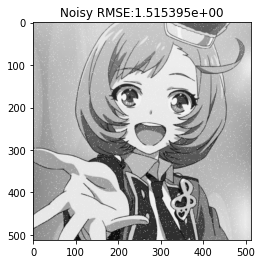

In [5]:
img = Image.open('naru512.jpg').convert("L")
original = np.asarray(img)
mask = np.random.randint(1, 100, original.shape) >= 98
noiseadd = np.where(mask, 255, original)

# 誤差
rmse = np.sqrt(np.mean((original - noiseadd)**2))

plt.title('Noisy RMSE:%e' % rmse)
plt.imshow(noiseadd, cmap="gray")

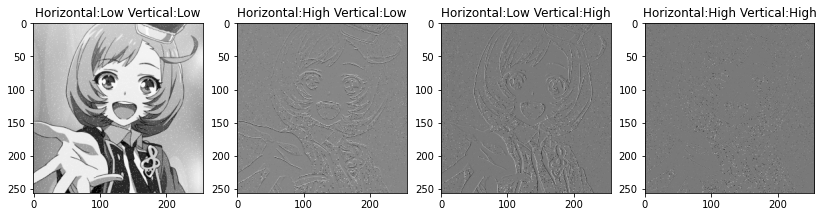

In [6]:
DAUBECHIES4_SCALING_COEF = [0.230377813309, 0.714846570553, 0.630880767930, -0.027983769417,\
        -0.187034811719, 0.030841381836, 0.032883011667, -0.010597401785]

# 一回画像を2次元FWT
ll, hl, lh, hh = fwt.fwt2d(noiseadd, HAAR_SCALING_COEF)

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

plt.subplot(1,4,1)
plt.title('Horizontal:Low Vertical:Low')
plt.imshow(ll, cmap="gray")
plt.subplot(1,4,2)
plt.title('Horizontal:High Vertical:Low')
plt.imshow(hl, cmap="gray")
plt.subplot(1,4,3)
plt.title('Horizontal:Low Vertical:High')
plt.imshow(lh, cmap="gray")
plt.subplot(1,4,4)
plt.title('Horizontal:High Vertical:High')
plt.imshow(hh, cmap="gray")

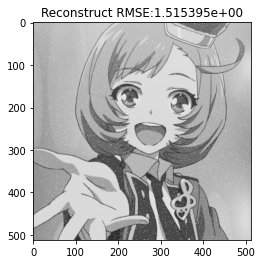

In [7]:
# 高域にノイズが乗っていると考えて，
hh = np.where(np.abs(hh) < 200, 0, hh)
reconstruct = fwt.ifwt2d(ll, hl, lh, hh, HAAR_SCALING_COEF)

# 再構成誤差
rmse = np.sqrt(np.mean((original - noiseadd)**2))

plt.title('Reconstruct RMSE:%e' % rmse)
plt.imshow(reconstruct, cmap="gray")